In [1]:
# import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import numpy as np
import math
import dataframe_image as dfi

In [2]:
# import hurricane data from csv

hurdat = pd.read_csv(r"C:/Users/jacks/Documents/Springboard/hurricanes_capstone/HURDAT2 Data.csv")

In [3]:
hurdat.head()

,Name,Date,Time,Status,Lat,Long,Maximum sustained wind,Minimum Pressure,34 kt radii NE,34 kt radii SE,...,50 kt radii SW,50 kt radii NW,64 kt radii NE,64 kt radii SE,64 kt radii SW,64 kt radii NW,87 kt radii NE (est),87 kt radii SE (est),87 kt radii SW (est),87 kt radii NW (est)
0,Alex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FALSE,20040731,1800,TD,30.3N,78.3W,25.0,1010.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FALSE,20040801,0,TD,31.0N,78.8W,25.0,1009.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FALSE,20040801,600,TD,31.5N,79.0W,25.0,1009.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FALSE,20040801,1200,TD,31.6N,79.1W,30.0,1009.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
hurdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8566 entries, 0 to 8565
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8566 non-null   object 
 1   Date                    8565 non-null   object 
 2   Time                    8565 non-null   object 
 3   Status                  8298 non-null   object 
 4   Lat                     8298 non-null   object 
 5   Long                    8298 non-null   object 
 6   Maximum sustained wind  8298 non-null   float64
 7   Minimum Pressure        8298 non-null   float64
 8   34 kt radii NE          8298 non-null   float64
 9   34 kt radii SE          8298 non-null   float64
 10  34 kt radii SW          8298 non-null   float64
 11  34 kt radii NW          8298 non-null   float64
 12  50 kt radii NE          8298 non-null   float64
 13  50 kt radii SE          8298 non-null   float64
 14  50 kt radii SW          8298 non-null   

In [5]:
# fix date column

hurdat['Date'] = pd.to_datetime(hurdat['Date'],errors='coerce',yearfirst=False)

In [6]:
hurdat.head()

,Name,Date,Time,Status,Lat,Long,Maximum sustained wind,Minimum Pressure,34 kt radii NE,34 kt radii SE,...,50 kt radii SW,50 kt radii NW,64 kt radii NE,64 kt radii SE,64 kt radii SW,64 kt radii NW,87 kt radii NE (est),87 kt radii SE (est),87 kt radii SW (est),87 kt radii NW (est)
0,Alex,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FALSE,2004-07-31,1800,TD,30.3N,78.3W,25.0,1010.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FALSE,2004-08-01,0,TD,31.0N,78.8W,25.0,1009.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FALSE,2004-08-01,600,TD,31.5N,79.0W,25.0,1009.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FALSE,2004-08-01,1200,TD,31.6N,79.1W,30.0,1009.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# fix the name column
# remove whitespace and capitalize the first letter of each name

name_col = [name.title() for name in list(hurdat['Name'].str.lstrip())]

# create a list of names called 'new_names'
# make each 'FALSE' the preceeding name until the next name

new_names = []
name = ''

for x in name_col:
    if x != 'False':
        new_names.append(x)
        name = x
    else:
        new_names.append(name)
        
# add Storm Names column

hurdat['Storm_Name'] = new_names

# remove the Name column

hurdat.drop('Name',axis=1,inplace=True)

In [8]:
# remove rows with excessive NaN values
# without doing this I am unable to change the Year datatype

hurdat.dropna(axis=0,thresh=10,inplace=True)

In [9]:
# extract year from date column and create Year column as int datatype

hurdat['Year'] = pd.array([i.year for i in hurdat.Date], dtype='int')

In [10]:
# rearrange the columns

hurdat = hurdat.reindex(columns = ['Year','Storm_Name','Time','Date','Status','Lat','Long','Maximum sustained wind','Minimum Pressure','34 kt radii NE','34 kt radii SE','34 kt radii SW','34 kt radii NW','50 kt radii NE','50 kt radii SE','50 kt radii SW','50 kt radii NW','64 kt radii NE','64 kt radii SE','64 kt radii SW','64 kt radii NW','87 kt radii NE (est)','87 kt radii SE (est)','87 kt radii SW (est)','87 kt radii NW (est)'])

In [11]:
hurdat.head()

,Year,Storm_Name,Time,Date,Status,Lat,Long,Maximum sustained wind,Minimum Pressure,34 kt radii NE,...,50 kt radii SW,50 kt radii NW,64 kt radii NE,64 kt radii SE,64 kt radii SW,64 kt radii NW,87 kt radii NE (est),87 kt radii SE (est),87 kt radii SW (est),87 kt radii NW (est)
1,2004,Alex,1800,2004-07-31,TD,30.3N,78.3W,25.0,1010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004,Alex,0,2004-08-01,TD,31.0N,78.8W,25.0,1009.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004,Alex,600,2004-08-01,TD,31.5N,79.0W,25.0,1009.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,Alex,1200,2004-08-01,TD,31.6N,79.1W,30.0,1009.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2004,Alex,1800,2004-08-01,TS,31.6N,79.2W,35.0,1009.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# set Year to index

hurdat = hurdat.set_index(['Year'])

In [13]:
# change column names to names easier to work with

hurdat.columns = ['Storm_Name','Time','Date', 'Status', 'Lat', 'Long', 'Max_Wind',
       'Min_Pressure', 'ne_34_kt', 'se_34_kt',
       'sw_34_kt', 'nw_34_kt', 'ne_50_kt', 'se_50_kt',
       'sw_50_kt', 'nw_50_kt', 'ne_64_kt', 'se_64_kt',
       'sw_64_kt', 'nw_64_kt', 'ne_87_kt', 'se_87_kt',
       'sw_87_kt', 'nw_87_kt']

In [14]:
# find and observe the observations that are not within proper measurement times

times = ['0','600','1200','1800']
off_times = [x for x in hurdat['Time'] if x not in times]
off_time_percent = (len(off_times)/len(hurdat['Time']))*100
off_times_df = hurdat[hurdat['Time'].isin(off_times)]
off_time_erroneous = ((off_times_df[off_times_df['ne_34_kt'].isin([0.00, 999.0, -999.0])]['ne_34_kt'].count())/len(off_times))*100

In [15]:
print('Total number irregularly timed observations: {}\nPercentage of irregularly timed observations: {} '.format(len(off_times), round(off_time_percent, 2)))
print('Percentage of irregularly time observations\n   with erroneous data: {}'.format(round(off_time_erroneous,2)))

Total number irregularly timed observations: 241
Percentage of irregularly timed observations: 2.9 
Percentage of irregularly time observations
   with erroneous data: 41.91


In [16]:
# a large percentage of rows that are not at 0, 600, 1200, or 1800 have erroneous data
# remove those rows whose time is not == 0, 600, 1200, 0r 1800

hurdat = hurdat[hurdat['Time'].isin(['0','600','1200','1800'])]

In [17]:
# strip whitespace in front of statuses

hurdat['Status'] = hurdat['Status'].str.strip()

# remove storms that aren't a tropical depression, tropical storm, or hurricane

drop_status=['EX','WV','LO','SS','SD','DB']
hurdat = hurdat[~hurdat['Status'].isin(drop_status)]

In [18]:
# remove the hemispheres from the lat and long

hurdat['Lat'] = hurdat['Lat'].str.strip(to_strip='N')
hurdat['Long'] = hurdat['Long'].str.strip(to_strip='W')

In [19]:
# change the lat and long to float type

hurdat['Lat'] = hurdat['Lat'].astype('float64')
hurdat['Long'] = hurdat['Long'].astype('float64')

In [20]:
# convert Long coordinates to 360 degree scale

hurdat['Long'] = 359-hurdat['Long']

# Feature Engineering

### Clean each radii and calculate the wind field (diameter) of each wind speed threshold

In [21]:
# remove negative values from the radii

for col in range(8,24):
    hurdat.iloc[:,col].clip(lower=0, inplace=True)

In [22]:
# caluculate effective radius for each wind threshold
# eff_rad_* function calculates the Effective Radius for the 4 wind thresholds
# the value output is in nautical miles

def eff_rad_34(x):
    if x['Max_Wind']>=34:
        num = (0.5*(math.sqrt((x['ne_34_kt']**2) + (x['se_34_kt']**2) + (x['sw_34_kt']**2) + (x['nw_34_kt']**2))))
        return round(num,2)

def eff_rad_50(x):
    if x['Max_Wind']>=50:
        num = (0.5*(math.sqrt((x['ne_50_kt']**2) + (x['se_50_kt']**2) + (x['sw_50_kt']**2) + (x['nw_50_kt']**2))))
        return round(num,2)

def eff_rad_64(x):
    if x['Max_Wind']>=64:
        num = (0.5*(math.sqrt((x['ne_64_kt']**2) + (x['se_64_kt']**2) + (x['sw_64_kt']**2) + (x['nw_64_kt']**2))))
        return round(num,2)
    
def eff_rad_87(x):
    if x['Max_Wind']>=87:
        num = (0.5*(math.sqrt((x['ne_87_kt']**2) + (x['se_87_kt']**2) + (x['sw_87_kt']**2) + (x['nw_87_kt']**2))))
        return round(num,2)

In [23]:
# use .apply function to create new columns

hurdat['34kt Wind Field']=hurdat.apply(eff_rad_34, axis=1)
hurdat['50kt Wind Field']=hurdat.apply(eff_rad_50, axis=1)
hurdat['64kt Wind Field']=hurdat.apply(eff_rad_64, axis=1)
hurdat['87kt Wind Field']=hurdat.apply(eff_rad_87, axis=1)

### Create more concise dataframe

In [24]:
# this also allows for the wind radii columns to be dropped

hsi = hurdat.drop(hurdat.columns[8:24], axis=1)

# with the creation of the wind fields being respective of the effective radius calculation 
# a large number of NaN values have been created
# change NaN values in eff_rad_* columns to 0.0

hsi=hsi.fillna(0.0)

### Calculate intensity points

In [25]:
# define a function to assign intensity points

def intensity(df):
    if df['Max_Wind']<30:
        return 0
    elif df['Max_Wind']>=30 and df['Max_Wind']<=150:
        return round((df['Max_Wind']/30)**2, 1)
    else:
        return 25

In [26]:
# create and insert intensity column

intensity = list(hsi.apply(intensity, axis=1))
hsi.insert(8, 'Intensity_pts', intensity, True)

In [27]:
# drop all observations with a max wind < 30kts

hsi = hsi.loc[hsi['Max_Wind']>=30]

In [28]:
hsi.describe()

,Lat,Long,Max_Wind,Min_Pressure,Intensity_pts,34kt Wind Field,50kt Wind Field,64kt Wind Field,87kt Wind Field
count,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000
mean,24.196359,297.307015,57.446626,989.111132,4.418929,79.488507,27.495208,10.498666,2.918473
std,8.225277,19.484104,26.080182,20.641486,4.342911,60.086209,33.818294,18.600064,8.180016
min,7.700000,257.100000,30.000000,882.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17.200000,281.800000,35.000000,980.000000,1.400000,37.750000,0.000000,0.000000,0.000000
50%,23.800000,296.400000,50.000000,996.000000,2.800000,70.710000,15.000000,0.000000,0.000000
75%,30.500000,312.700000,70.000000,1005.000000,5.400000,114.020000,47.430000,17.320000,0.000000
max,48.800000,353.000000,160.000000,1015.000000,25.000000,415.090000,196.530000,117.150000,48.870000


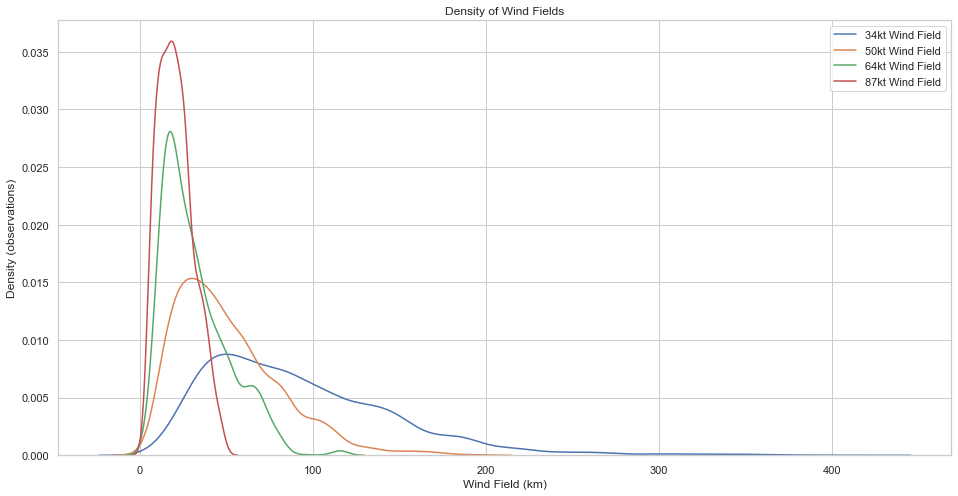

In [29]:
# using series created from each wind field with winds over 0 kt
# produce a kde plot to see the density of observations

plt.figure(figsize=(16,8))
sns.kdeplot(data=hsi[hsi['34kt Wind Field']>0]['34kt Wind Field'], label='34kt Wind Field')
sns.kdeplot(data=hsi[hsi['50kt Wind Field']>0]['50kt Wind Field'], label='50kt Wind Field')
sns.kdeplot(data=hsi[hsi['64kt Wind Field']>0]['64kt Wind Field'], label='64kt Wind Field')
sns.kdeplot(data=hsi[hsi['87kt Wind Field']>0]['87kt Wind Field'], label='87kt Wind Field')

plt.xlabel('Wind Field (km)')
plt.ylabel('Density (observations)')
plt.title('Density of Wind Fields')
plt.legend()

plt.show()

The kdeplot above gives a quick visual showing the wind field observations bunched toward the lower end of the size range and tailing off to the right as expected.

In [30]:
# calculate the range in wind field size for the middle 95%

upper_34 = hsi['34kt Wind Field'].quantile(0.975)
lower_34 = hsi[hsi['34kt Wind Field']>0]['34kt Wind Field'].quantile(0.025)
range_34 = upper_34-lower_34

upper_50 = hsi['50kt Wind Field'].quantile(0.975)
lower_50 = hsi[hsi['50kt Wind Field']>0]['50kt Wind Field'].quantile(0.025)
range_50 = upper_50-lower_50

upper_64 = hsi['64kt Wind Field'].quantile(0.975)
lower_64 = hsi[hsi['64kt Wind Field']>0]['64kt Wind Field'].quantile(0.025)
range_64 = upper_64-lower_64

upper_87 = hsi['87kt Wind Field'].quantile(0.975)
lower_87 = hsi[hsi['87kt Wind Field']>0]['87kt Wind Field'].quantile(0.025)
range_87 = upper_87-lower_87

In [31]:
# normalize each wind field range to the point scale for each respective wind threshold

def size_pts(df):
    pts_34 = 2 * (df['34kt Wind Field']-lower_34) / range_34 + 1
    pts_50 = 3 * (df['50kt Wind Field']-lower_50) / range_50 + 1
    pts_64 = 7 * (df['64kt Wind Field']-lower_64) / range_64 + 1
    pts_87 = 9 * (df['87kt Wind Field']-lower_87) / range_87 + 1
    return pts_34+pts_50+pts_64+pts_87

In [32]:
# insert the Size_pts column based on the results from the size_pts function

hsi.insert(9,'Size_pts', list(hsi.apply(size_pts, axis=1)), True)

In [33]:
# normalize size_pts to a scale of 1 to 25

upper_size = hsi['Size_pts'].max()
lower_size = hsi['Size_pts'].min()
range_size = upper_size - lower_size

hsi['Size_pts'] = round(24 * (hsi['Size_pts']-lower_size) / range_size + 1, 1)

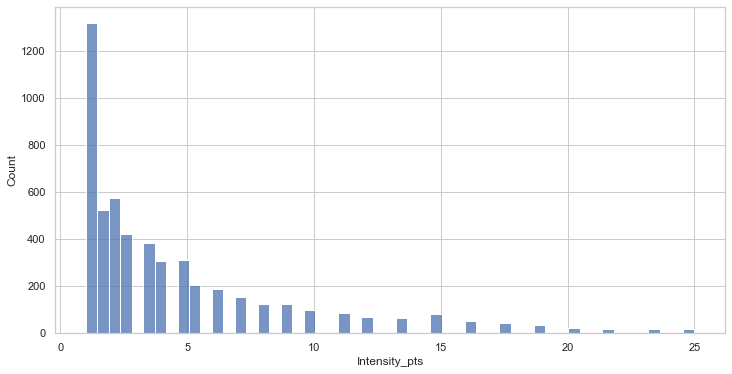

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data=hsi, x=hsi['Intensity_pts'], bins='auto')
plt.show()

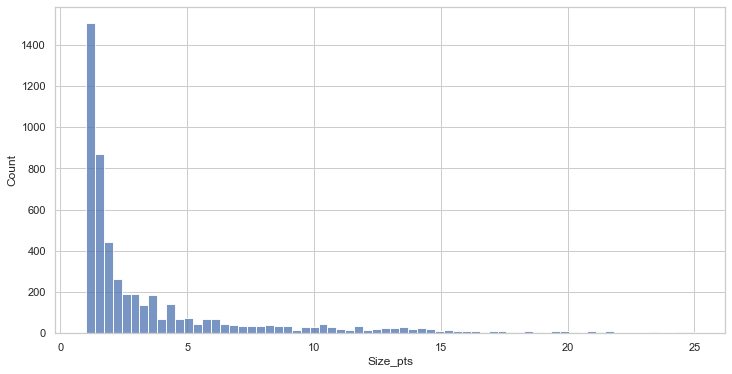

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data=hsi, x=hsi['Size_pts'], bins='auto')
plt.show()

In [36]:
# create Severity column by adding Intensity pts and Size pts

hsi.insert(10, 'Severity', hsi['Intensity_pts']+hsi['Size_pts'], True)

In [37]:
# normalize Severity to 1 to 50 scale

hsi['Severity'] = round(49 * ((hsi['Severity'] - 2) / (hsi['Severity'].max() - hsi['Severity'].min())) +1, 1)

In [38]:
hsi.head()

,Storm_Name,Time,Date,Status,Lat,Long,Max_Wind,Min_Pressure,Intensity_pts,Size_pts,Severity,34kt Wind Field,50kt Wind Field,64kt Wind Field,87kt Wind Field
Year,,,,,,,,,,,,,,,
2004,Alex,1200,2004-08-01,TD,31.6,279.9,30.0,1009.0,1.0,1.0,1.0,0.00,0.00,0.0,0.0
2004,Alex,1800,2004-08-01,TS,31.6,279.8,35.0,1009.0,1.4,1.3,1.7,35.36,0.00,0.0,0.0
2004,Alex,0,2004-08-02,TS,31.5,279.7,35.0,1007.0,1.4,1.3,1.7,35.36,0.00,0.0,0.0
2004,Alex,600,2004-08-02,TS,31.4,279.6,40.0,1005.0,1.8,1.5,2.3,70.36,0.00,0.0,0.0
2004,Alex,1200,2004-08-02,TS,31.3,280.0,50.0,992.0,2.8,1.9,3.8,66.57,21.21,0.0,0.0


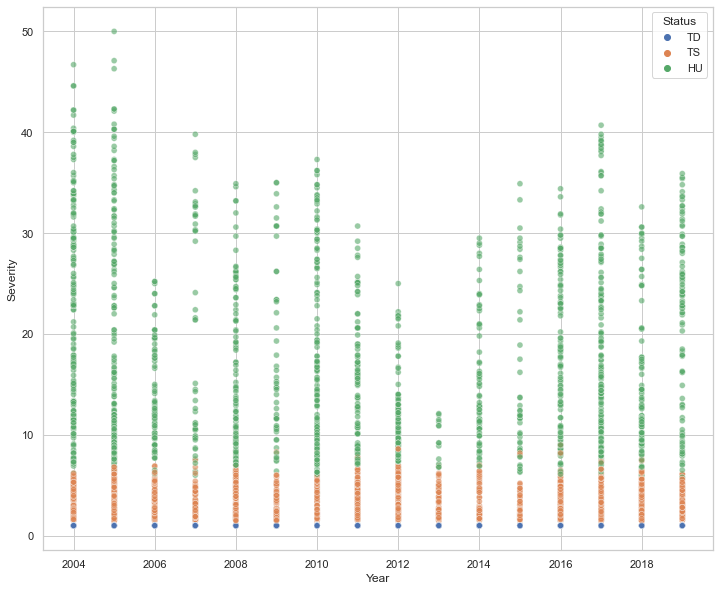

In [39]:
plt.figure(figsize = (12,10))
sns.scatterplot(data=hsi, x=hsi.index, y='Severity', hue='Status', alpha=0.6)

plt.show()

In [40]:
# find the average severity score for each year

avg_sev = []

for i in hsi.index.unique():
    avg = hsi['Severity'][hsi.index==i].mean()
    avg_sev.append(avg)

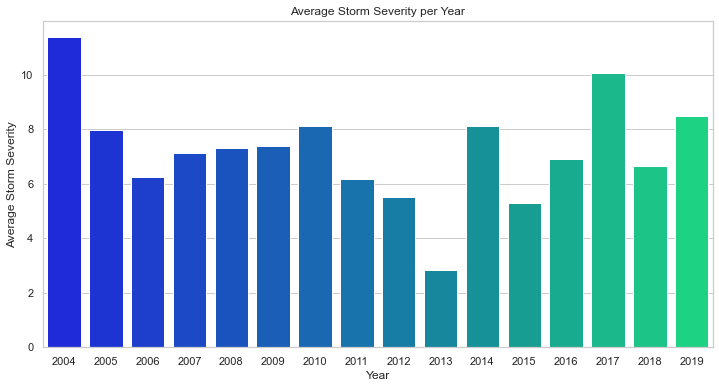

In [41]:
fig = plt.figure()
fig.set_size_inches(12,6)

sns.barplot(x=hsi.index.unique(), y=avg_sev, palette='winter')
plt.title('Average Storm Severity per Year')
plt.ylabel('Average Storm Severity')

plt.show()

In [42]:
hsi.groupby(['Year'])['Severity'].mean().to_frame('Average Severity')

,Average Severity
Year,
2004,11.387864
2005,7.975379
2006,6.239326
2007,7.110989
2008,7.319841
2009,7.386986
2010,8.107299
2011,6.152835
2012,5.501566


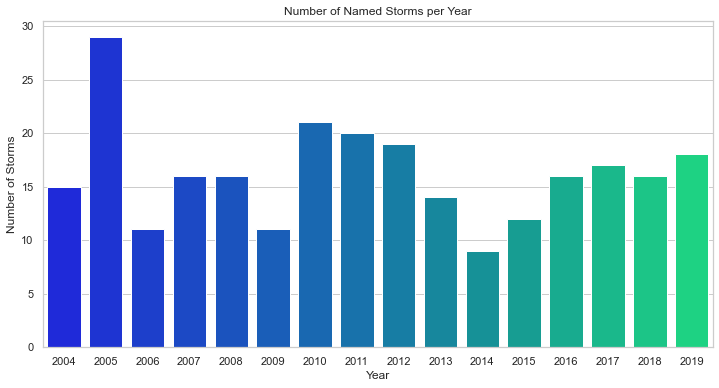

In [43]:
# find the number of storms each year

annual_storms = hsi.groupby([hsi.index])['Storm_Name'].nunique().to_frame('Number of Storms')

fig = plt.figure()
fig.set_size_inches(12,6)
sns.barplot(data=annual_storms, x=annual_storms.index, y='Number of Storms', palette='winter')
plt.title('Number of Named Storms per Year')
plt.ylabel('Number of Storms')

plt.show()

In [44]:
annual_storms

,Number of Storms
Year,
2004,15
2005,29
2006,11
2007,16
2008,16
2009,11
2010,21
2011,20
2012,19


### Create dataframe with single observations per storm

In [45]:
# find the minimum pressure, max intensity, max size, max wind, and max severity for each storm

date = hsi.reset_index().groupby(by=[hsi.index, 'Storm_Name'])['Date'].min().to_frame()
min_pressure = hsi.reset_index().groupby(by=[hsi.index, 'Storm_Name'])['Min_Pressure'].min().to_frame()
max_severity = hsi.reset_index().groupby(by=[hsi.index, 'Storm_Name'])['Severity'].max().to_frame()
max_intensity = hsi.reset_index().groupby(by=[hsi.index, 'Storm_Name'])['Intensity_pts'].max().to_frame()
max_size = hsi.reset_index().groupby(by=[hsi.index, 'Storm_Name'])['Size_pts'].max().to_frame()
max_wind = hsi.reset_index().groupby(by=[hsi.index, 'Storm_Name'])['Max_Wind'].max().to_frame()

In [46]:
# merge all the dataframes above into one

hsi2 = date.merge(
    max_severity.merge(
        max_intensity.merge(
            max_size.merge(
                max_wind.merge(
                    min_pressure, on=['Year','Storm_Name']), on=['Year','Storm_Name']), on=['Year','Storm_Name']), on=['Year','Storm_Name']), on=['Year','Storm_Name'])

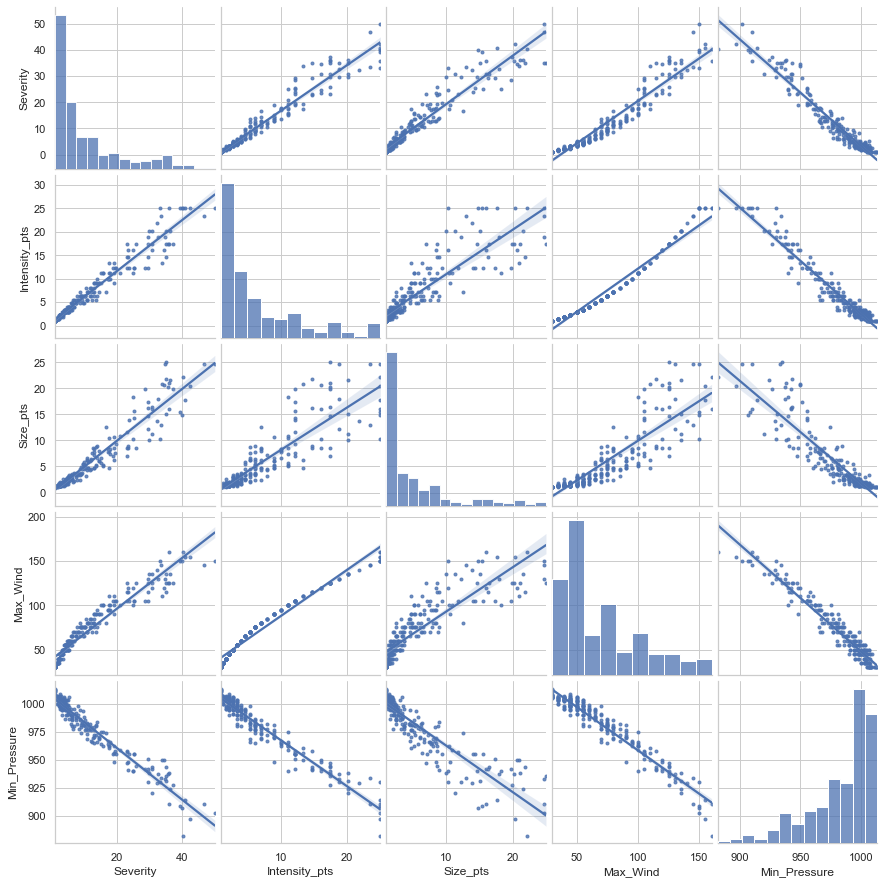

In [47]:
sns.pairplot(hsi2, kind='reg', markers='.')

plt.show()

In [48]:
# define a function to categorize each storm

def storm_categorizer(storm):
    if storm['Max_Wind']<=33:
        return 'Tropical Depression'
    elif (storm['Max_Wind']>33) and (storm['Max_Wind']<=63):
        return 'Tropical Storm'
    elif (storm['Max_Wind']>63) and (storm['Max_Wind']<=82):
        return 'Cat 1: Hurricane'
    elif (storm['Max_Wind']>82) and (storm['Max_Wind']<=95):
        return 'Cat 2: Hurricane'
    elif (storm['Max_Wind']>95) and (storm['Max_Wind']<=112):
        return 'Cat 3: Hurricane'
    elif (storm['Max_Wind']>112) and (storm['Max_Wind']<=136):
        return 'Cat 4: Hurricane'
    elif storm['Max_Wind']>136:
        return 'Cat 5: Hurricane'

In [49]:
hsi2['Category'] = hsi2.apply(storm_categorizer, axis=1)

In [50]:
# view the top 25 storms based on Severity

top_25 = hsi2.sort_values(by='Severity', ascending=False).head(25)

plt.show()

Sorting the storms by Severity we see that the 7 highest rated storms are Category 5 Hurricanes. However beginning with Hurricane Earl at #8, Category 4 storms begin to appear with more Category 5 storms to follow. We even see Hurricane Humberto from September of 2019 ranked at #18 even though it only reached a maximum of Category 3 based on the Saffir-Simpson scale.

Hurricane Humberto only produced a maximum sustained wind of 110 kts but had a large wind field. The storm produced winds that ranked it within the 87.0 percentile for Intensity, but its wind field was very large in contrast placing it in the 97.0 percentile for Size.

In [51]:
from scipy.stats import percentileofscore

In [52]:
hum_intensity = round(percentileofscore(hsi2['Intensity_pts'], hsi2.loc[(2019,'Humberto'),'Intensity_pts']), 0)
hum_size = round(percentileofscore(hsi2['Size_pts'], hsi2.loc[(2019,'Humberto'),'Size_pts']), 0)

print('Hurricane Humberto produced winds that ranked it within the {} percentile for Intensity.'.format(hum_intensity))
print("Hurricane Humberto's wind field was very large in contrast placing it in the {} percentile for Size.".format(hum_size))

Hurricane Humberto produced winds that ranked it within the 87.0 percentile for Intensity.
Hurricane Humberto's wind field was very large in contrast placing it in the 97.0 percentile for Size.


#  Predict storm category using k-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report

In [54]:
features = hsi2['Min_Pressure']
target = hsi2['Category']
features = np.array(features)
features = features.reshape(-1,1)
X_train, X_test, y_train, y_test = tts(features, target, test_size=0.2, random_state=42)

In [55]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

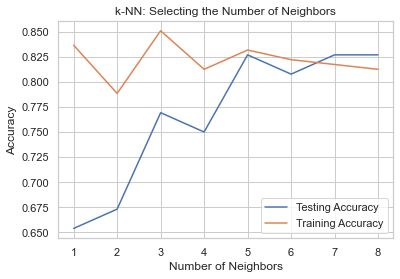

In [56]:
plt.title('k-NN: Selecting the Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   Cat 1: Hurricane       0.70      0.64      0.67        11
   Cat 2: Hurricane       0.50      0.33      0.40         3
   Cat 3: Hurricane       1.00      1.00      1.00         3
   Cat 4: Hurricane       0.80      1.00      0.89         4
   Cat 5: Hurricane       1.00      0.50      0.67         2
Tropical Depression       1.00      0.50      0.67         2
     Tropical Storm       0.87      0.96      0.91        27

           accuracy                           0.83        52
          macro avg       0.84      0.70      0.74        52
       weighted avg       0.82      0.83      0.82        52



# Predict storm severity using linear regression

In [59]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [60]:
# features are still only Min_Pressure

target2 = hsi2['Severity']
X_trainlr, X_testlr, y_trainlr, y_testlr = tts(features, target2, test_size=0.2, random_state=42)

In [61]:
lr = LinearRegression()
lr.fit(X_trainlr, y_trainlr)
y_predlr = lr.predict(X_testlr)

print('R^2: {}'.format(lr.score(X_trainlr, y_trainlr)))
rmse = np.sqrt(mean_squared_error(y_testlr, y_predlr))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9417779398735875
Root Mean Squared Error: 2.7251428842766794


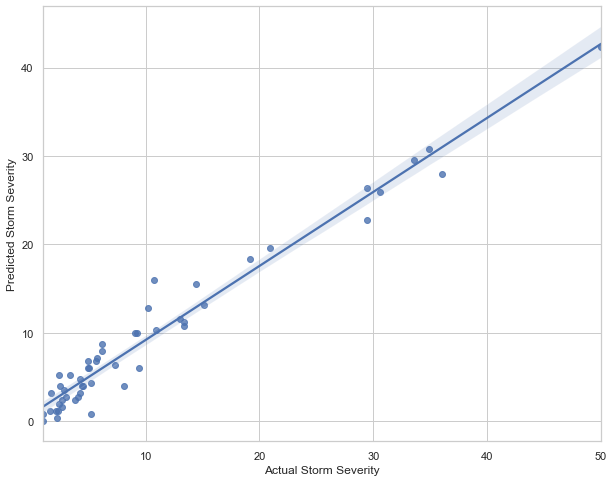

In [62]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_testlr, y=y_predlr)
plt.xlabel('Actual Storm Severity')
plt.ylabel('Predicted Storm Severity')

plt.show()

In [63]:
# find the 4-fold cross-validation scores

cv_scores = cross_val_score(lr, features, target2, cv=4)

print(cv_scores)
print('Average 4-fold CV score: {}'.format(np.mean(cv_scores)))

[0.95037715 0.94071027 0.89971526 0.94041216]
Average 4-fold CV score: 0.9328037117500996
